<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

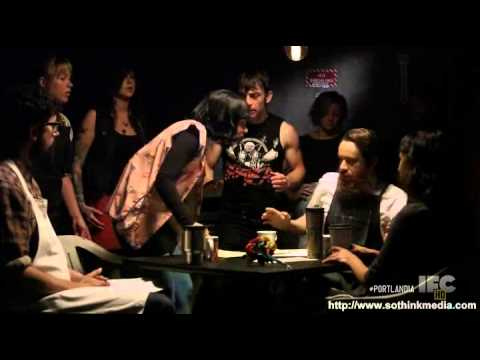

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\ivana\\OneDrive\\Desktop\\NPL\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [91]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [92]:
# Base
from collections import Counter
import re
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")


In [93]:
# CLEANING text before analyzing it
def tokenize(text):
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [94]:
# clean star rating by turning it to floats
shops.star_rating = pd.to_numeric(shops.star_rating.str.replace('star rating', ''))

In [95]:
# cleam full review text by removing date
shops['full_review_text'] = shops['full_review_text'].map(lambda x: x[11:].strip())

In [96]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0


In [101]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [102]:
shops['tokens'].head()

0    [1, checkin, love, love, loved, the, atmospher...
1    [listed, in, date, night, austin, ambiance, in...
2    [1, checkin, listed, in, brunch, spots, i, lov...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [1, checkin, they, are, located, within, the, ...
Name: tokens, dtype: object

In [103]:
from collections import Counter

shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34754),
 ('and', 26653),
 ('a', 22746),
 ('coffee', 20455),
 ('i', 20097),
 ('to', 17259),
 (' ', 14990),
 ('of', 12600),
 ('is', 12000),
 ('place', 11446)]

In [104]:
# Transform a word into base form by lemmatization

def get_lemmas(text):
    lemmas = []
    doc = nlp(text)
    
    for token in doc:
        if((token.is_stop ==False) and (token.is_punct ==False)) and (token.pos_!='PRON'):
            lemmas.append(token.lemma_)
    return lemmas

In [105]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [106]:
shops['lemmas'].head(10)

0    [1, check, love, love, love, atmosphere, corne...
1    [list, Date, Night, Austin, Ambiance, Austin, ...
2    [1, check, list, Brunch, Spots, love, eclectic...
3    [cool, decor, good, drink, nice, seating,  ,  ...
4    [1, check, locate, Northcross, mall, shopping,...
5    [1, check, cute, cafe, think, moment, step, fi...
6    [2, check, in, list, Nuptial, Coffee, Bliss, A...
7    [2, check, in, love, place,  , 5, star, cleanl...
8    [1, check, ok, let, try, approach,  , pro, mus...
9    [3, check, in, place, show, social, medium, da...
Name: lemmas, dtype: object

In [107]:
# counting raw text
shops['full_review_text'].value_counts(normalize = True)[:3]


The greeting of an atmosphere it feels I created. This place speaks to my free spirited soul, with matcha lattes, swings inside that still fit in, pillows, and waffles. This might be the next artist home where computers aren't encouraged by the architecture, but books, talking and chess are. Matcha latte with lactose free milk and house book                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [108]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [109]:
shops['lemmas'].head(20)

0     [1, check, love, love, love, atmosphere, corne...
1     [list, Date, Night, Austin, Ambiance, Austin, ...
2     [1, check, list, Brunch, Spots, love, eclectic...
3     [cool, decor, good, drink, nice, seating,  ,  ...
4     [1, check, locate, Northcross, mall, shopping,...
5     [1, check, cute, cafe, think, moment, step, fi...
6     [2, check, in, list, Nuptial, Coffee, Bliss, A...
7     [2, check, in, love, place,  , 5, star, cleanl...
8     [1, check, ok, let, try, approach,  , pro, mus...
9     [3, check, in, place, show, social, medium, da...
10    [1, check, list, Americano, average, cute, stu...
11    [store, A+, decoration, honestly, coffee, good...
12    [1, check, list, 2016, Time, Charm, Factory, a...
13    [cute, little, cafe, drive, place, time, notic...
14    [beautiful, eccentric, coffee, shop, library, ...
15    [1, check, list, Search, Fantastic, Coffee, wa...
16    [love, atmosphere, frequent, coffee, shop, def...
17    [1, check, check, video, review, youtube.c

In [110]:
# Analyzing Tokens
from collections import Counter

word_counts = Counter()
shops['lemmas'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words applying lemmas
word_counts.most_common(10)

[(' ', 14990),
 ('coffee', 10111),
 ('place', 6021),
 ('good', 5363),
 ('great', 3881),
 ('check', 3468),
 ('like', 3378),
 ('come', 2631),
 ('time', 2381),
 ('drink', 2338)]

In [111]:
# dataframe of word counts for us to analyze.

In [112]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [113]:
wc = count(shops['lemmas'])

In [119]:
wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
1,,4343,14990,1.0,0.039738,0.039738,0.570247
15,coffee,4831,10111,2.0,0.026804,0.066542,0.634322
112,place,3876,6021,3.0,0.015962,0.082504,0.508929
166,good,3572,5363,4.0,0.014217,0.096721,0.469013
85,great,2815,3881,5.0,0.010288,0.107009,0.369617
9,check,3175,3468,6.0,0.009194,0.116203,0.416886
148,like,2272,3378,7.0,0.008955,0.125158,0.298319
420,come,1927,2631,8.0,0.006975,0.132133,0.253020
497,time,1762,2381,9.0,0.006312,0.138445,0.231355
22,drink,1635,2338,10.0,0.006198,0.144643,0.214680


In [120]:
wc.tail(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
17097,Rustica,1,1,17100.0,0.000003,0.999976,0.000131
17103,Lettuce,1,1,17101.0,0.000003,0.999979,0.000131
17099,romaine,1,1,17102.0,0.000003,0.999981,0.000131
17100,predictably,1,1,17103.0,0.000003,0.999984,0.000131
17102,blt,1,1,17104.0,0.000003,0.999987,0.000131
17101,Strata,1,1,17105.0,0.000003,0.999989,0.000131
17104,windowed,1,1,17106.0,0.000003,0.999992,0.000131
17106,actuality,1,1,17107.0,0.000003,0.999995,0.000131
17105,crass,1,1,17108.0,0.000003,0.999997,0.000131
17107,digestion,1,1,17109.0,0.000003,1.000000,0.000131


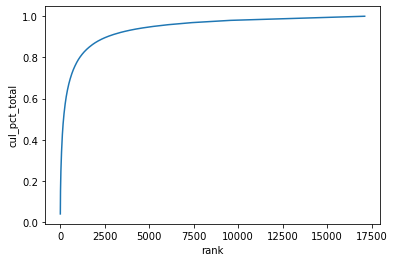

In [115]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [116]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.19872010688751096

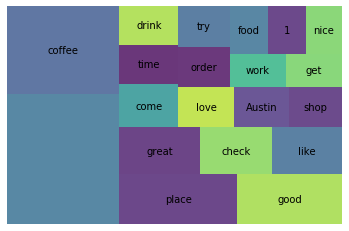

In [117]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [118]:
# counting raw text
shops['star_rating'].value_counts()

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: star_rating, dtype: int64

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

